# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  f"{url}q={city}&appid={weather_api_key}" # YOUR CODE HERE
  
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]# YOUR CODE HERE
        city_lng = city_weather["coord"]["lon"]# YOUR CODE HERE
        city_max_temp = city_weather["main"]["temp_max"]# YOUR CODE HERE
        city_humidity = city_weather["main"]["humidity"]# YOUR CODE HERE
        city_clouds = city_weather["clouds"]["all"]# YOUR CODE HERE
        city_wind = city_weather["wind"]["speed"]# YOUR CODE HERE
        city_country = city_weather["sys"]["country"]# YOUR CODE HERE
        city_date = city_weather["dt"]# YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | west island
Processing Record 2 of Set 1 | nova sintra
Processing Record 3 of Set 1 | mayya
Processing Record 4 of Set 1 | hawaiian paradise park
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | stanley
Processing Record 8 of Set 1 | itoman
Processing Record 9 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 10 of Set 1 | cargados carajos
City not found. Skipping...
Processing Record 11 of Set 1 | karratha
Processing Record 12 of Set 1 | utrik
Processing Record 13 of Set 1 | maceio
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | saipan
Processing Record 16 of Set 1 | qamdo
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | pontianak
Processing Record 19 of Set 1 | porto franco
Processing Record 20 of Set 1 | belyy yar
Processing Record 21 of Set 1 | gr

Processing Record 39 of Set 4 | lata
Processing Record 40 of Set 4 | santa cruz
Processing Record 41 of Set 4 | san pedro
Processing Record 42 of Set 4 | gongchangling
Processing Record 43 of Set 4 | puerto maldonado
Processing Record 44 of Set 4 | hadibu
Processing Record 45 of Set 4 | lenino
Processing Record 46 of Set 4 | yuzhno-kurilsk
Processing Record 47 of Set 4 | callao
Processing Record 48 of Set 4 | port mathurin
Processing Record 49 of Set 4 | arraial do cabo
Processing Record 0 of Set 5 | plettenberg bay
Processing Record 1 of Set 5 | uige
Processing Record 2 of Set 5 | bodaybo
Processing Record 3 of Set 5 | san fernando
Processing Record 4 of Set 5 | wailua homesteads
Processing Record 5 of Set 5 | paita
Processing Record 6 of Set 5 | agat village
Processing Record 7 of Set 5 | pisco
Processing Record 8 of Set 5 | pop
Processing Record 9 of Set 5 | bechar
Processing Record 10 of Set 5 | ciudad lazaro cardenas
Processing Record 11 of Set 5 | puerto deseado
Processing Record

Processing Record 32 of Set 8 | fuvahmulah
City not found. Skipping...
Processing Record 33 of Set 8 | stornoway
Processing Record 34 of Set 8 | ritchie
Processing Record 35 of Set 8 | walvis bay
Processing Record 36 of Set 8 | labuan
Processing Record 37 of Set 8 | mahanje
Processing Record 38 of Set 8 | port alfred
Processing Record 39 of Set 8 | kurchum
Processing Record 40 of Set 8 | coquimbo
Processing Record 41 of Set 8 | ammanford
Processing Record 42 of Set 8 | gazojak
Processing Record 43 of Set 8 | zherdevka
Processing Record 44 of Set 8 | vallegrande
Processing Record 45 of Set 8 | winnemucca
Processing Record 46 of Set 8 | clearwater
Processing Record 47 of Set 8 | olyokminsk
Processing Record 48 of Set 8 | castlegar
Processing Record 49 of Set 8 | grand-bassam
Processing Record 0 of Set 9 | hilo
Processing Record 1 of Set 9 | chaah
Processing Record 2 of Set 9 | alto barinas
Processing Record 3 of Set 9 | chiras
Processing Record 4 of Set 9 | gadzhiyevo
Processing Record 5

Processing Record 20 of Set 12 | mosjoen
Processing Record 21 of Set 12 | errachidia
Processing Record 22 of Set 12 | puerto asis
Processing Record 23 of Set 12 | privas
Processing Record 24 of Set 12 | puerto ayacucho
Processing Record 25 of Set 12 | pechora
Processing Record 26 of Set 12 | andreapol'
Processing Record 27 of Set 12 | moyynkum
Processing Record 28 of Set 12 | guerrero negro
Processing Record 29 of Set 12 | miyako
Processing Record 30 of Set 12 | marmaris
Processing Record 31 of Set 12 | koryazhma
Processing Record 32 of Set 12 | jalalpur
Processing Record 33 of Set 12 | bardai
Processing Record 34 of Set 12 | lompoc
Processing Record 35 of Set 12 | tamiahua
Processing Record 36 of Set 12 | kalmunai
Processing Record 37 of Set 12 | pizarro
Processing Record 38 of Set 12 | makarov
Processing Record 39 of Set 12 | kristiansund
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) # YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  \
0                  west island -12.1568   96.8225     24.99        78   
1                  nova sintra  14.8667  -24.7167     23.23        77   
2                        mayya  61.7333  130.2811      3.62        63   
3       hawaiian paradise park  19.5933 -154.9731     28.91        70   
4  edinburgh of the seven seas -37.0676  -12.3116     12.64        80   

   Cloudiness  Wind Speed Country        Date  
0          40        5.14      CC  1694912881  
1          14        3.07      CV  1694912881  
2         100        5.11      RU  1694912882  
3          20        4.12      US  1694912883  
4         100       13.09      SH  1694912744

In [6]:
import os

# Check if the directory exists, and if not, create it
if not os.path.exists("output_data"):
    os.makedirs("output_data")


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  \
City_ID                                                                       
0                        west island -12.1568   96.8225     24.99        78   
1                        nova sintra  14.8667  -24.7167     23.23        77   
2                              mayya  61.7333  130.2811      3.62        63   
3             hawaiian paradise park  19.5933 -154.9731     28.91        70   
4        edinburgh of the seven seas -37.0676  -12.3116     12.64        80   

         Cloudiness  Wind Speed Country        Date  
City_ID                                              
0                40        5.14      CC  1694912881  
1                14        3.07      CV  1694912881  
2               100        5.11      RU  1694912882  
3                20        4.12      US  1694912883  
4               100       13.09      SH  1694912744

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

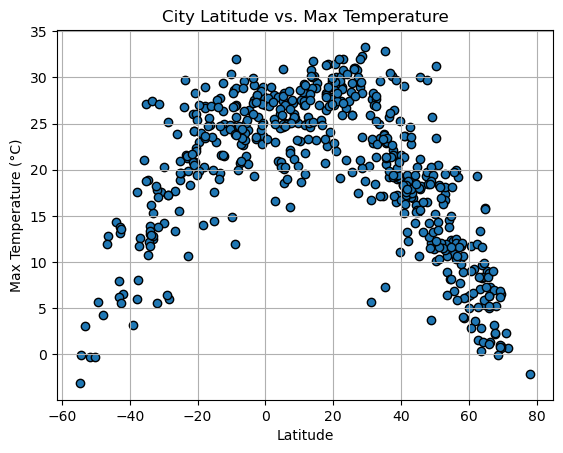

In [9]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.title("City Latitude vs. Max Temperature")
plt.grid(True)



# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

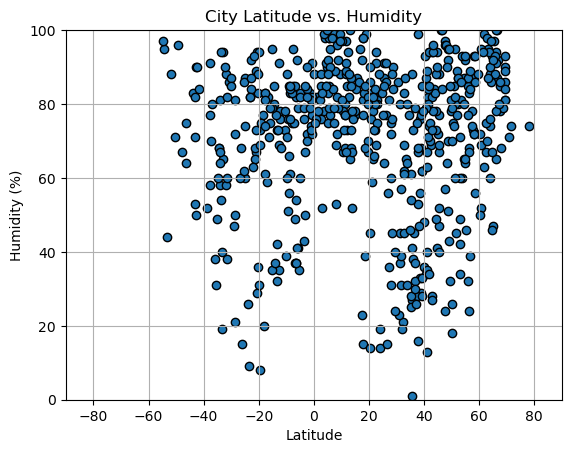

In [10]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlim(-90, 90)  # Set x-axis limits to match latitude range
plt.ylim(0, 100)   # Set y-axis limits for humidity (0-100%)
plt.axhline(0, color='black', linestyle='--', linewidth=0.7)  # Add a horizontal line at 0% humidity


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

C:\Users\joey5\AppData\Local\Temp\ipykernel_5984\3946138639.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.6, cmap='coolwarm')


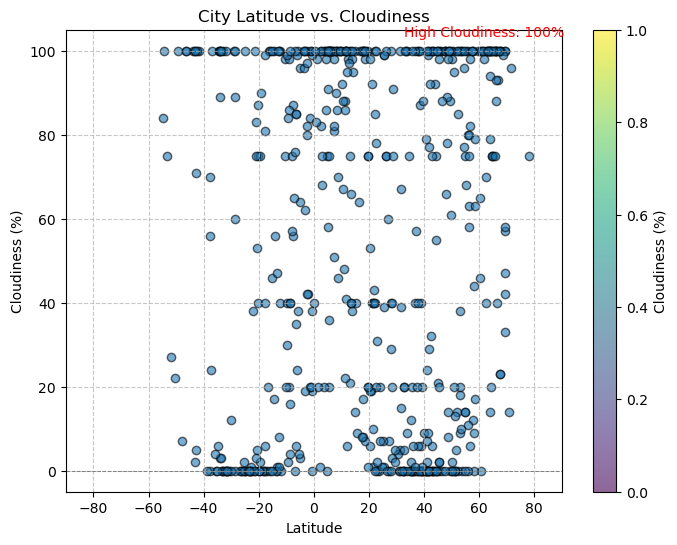

In [11]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.figure(figsize=(8, 6))  # Set the figure size for better visibility
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.6, cmap='coolwarm')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE
# Customize the plot appearance
plt.xlim(-90, 90)  # Set x-axis limits to match latitude range
plt.ylim(-5, 105)   # Set y-axis limits for cloudiness (-5% to 105% for better visualization)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)  # Add a horizontal line at 0% cloudiness

# Add colorbar to represent cloudiness values
colorbar = plt.colorbar()
colorbar.set_label("Cloudiness (%)")

# Annotate specific points on the plot (optional)
# Example: Annotate a point with high cloudiness
high_cloudiness_index = city_data_df["Cloudiness"].idxmax()
plt.annotate(f'High Cloudiness: {city_data_df["Cloudiness"].max()}%', 
             (city_data_df["Lat"][high_cloudiness_index], city_data_df["Cloudiness"][high_cloudiness_index]), 
             textcoords="offset points", xytext=(0, 10), ha='center', fontsize=10, color='red')

# Customize the grid style
plt.grid(linestyle="--", alpha=0.7)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

C:\Users\joey5\AppData\Local\Temp\ipykernel_5984\1194713934.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.6, cmap='coolwarm')


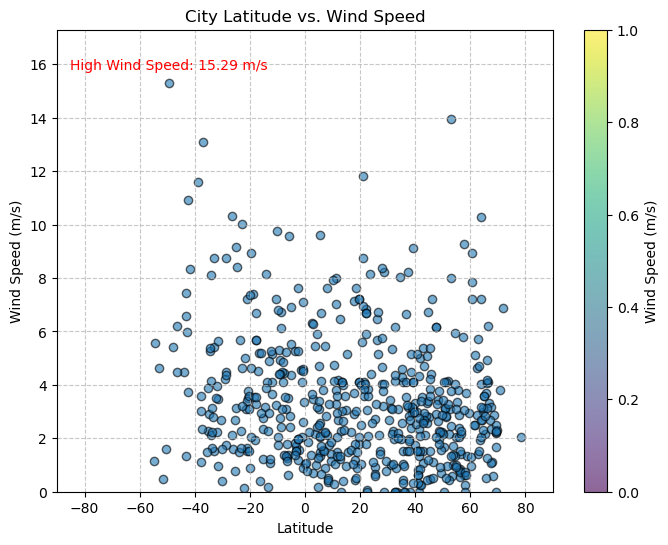

In [12]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.figure(figsize=(8, 6))  # Set the figure size for better visibility
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.6, cmap='coolwarm')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed")
plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE
# Customize the plot appearance
plt.xlim(-90, 90)  # Set x-axis limits to match latitude range
plt.ylim(0, city_data_df["Wind Speed"].max() + 2)  # Set y-axis limits for wind speed
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)  # Add a horizontal line at 0 m/s wind speed

# Add colorbar to represent wind speed values
colorbar = plt.colorbar()
colorbar.set_label("Wind Speed (m/s)")

# Annotate specific points on the plot (optional)
# Example: Annotate a point with high wind speed
high_wind_speed_index = city_data_df["Wind Speed"].idxmax()
plt.annotate(f'High Wind Speed: {city_data_df["Wind Speed"].max()} m/s', 
             (city_data_df["Lat"][high_wind_speed_index], city_data_df["Wind Speed"][high_wind_speed_index]), 
             textcoords="offset points", xytext=(0, 10), ha='center', fontsize=10, color='red')

# Customize the grid style
plt.grid(linestyle="--", alpha=0.7)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
import matplotlib.pyplot as plt
from scipy.stats import linregress

def plot_linear_regression(x_values, y_values, x_label, y_label, title, annotation, fig_name):
    # Calculate the linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regress_values = slope * x_values + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}\nR-squared = {r_value**2:.2f}"

    # Create the scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(x_values, y_values, edgecolors="black", alpha=0.6)
    plt.plot(x_values, regress_values, "r-", label="Linear Regression")

    # Annotate the linear regression equation on the plot
    plt.annotate(line_eq, annotation, fontsize=12, color="red")

    # Customize plot labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Customize legend
    plt.legend()

    # Save the figure as an image file
    plt.savefig(fig_name)

    # Show the plot
    plt.show()


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  \
City_ID                                                                  
1                   nova sintra  14.8667  -24.7167     23.23        77   
2                         mayya  61.7333  130.2811      3.62        63   
3        hawaiian paradise park  19.5933 -154.9731     28.91        70   
6                       stanley  54.8680   -1.6985     12.38        92   
7                        itoman  26.1247  127.6694     31.01        77   

         Cloudiness  Wind Speed Country        Date  
City_ID                                              
1                14        3.07      CV  1694912881  
2               100        5.11      RU  1694912882  
3                20        4.12      US  1694912883  
6                75        2.06      GB  1694912884  
7                75        5.66      JP  1694912885

In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  \
City_ID                                                                       
0                        west island -12.1568   96.8225     24.99        78   
4        edinburgh of the seven seas -37.0676  -12.3116     12.64        80   
5                           waitangi -43.9535 -176.5597     14.34        83   
8                           karratha -20.7377  116.8463     28.26        29   
10                            maceio  -9.6658  -35.7353     24.69        88   

         Cloudiness  Wind Speed Country        Date  
City_ID                                              
0                40        5.14      CC  1694912881  
4               100       13.09      SH  1694912744  
5               100        4.47      NZ  1694912747  
8                53        3.52      AU  1694912887  
10               40        2.06      BR  1694912756

###  Temperature vs. Latitude Linear Regression Plot

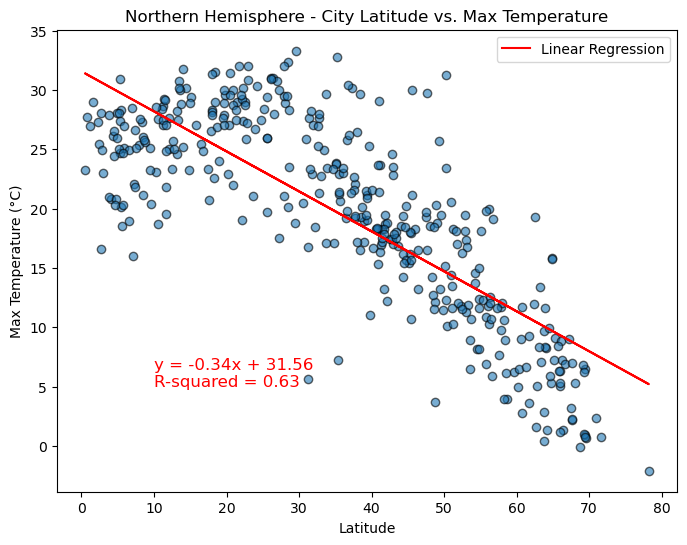

In [16]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
                       "Latitude", "Max Temperature (°C)",
                       "Northern Hemisphere - City Latitude vs. Max Temperature",
                       (10, 5), "output_data/Northern_Lat_vs_Max_Temp_Regression.png")


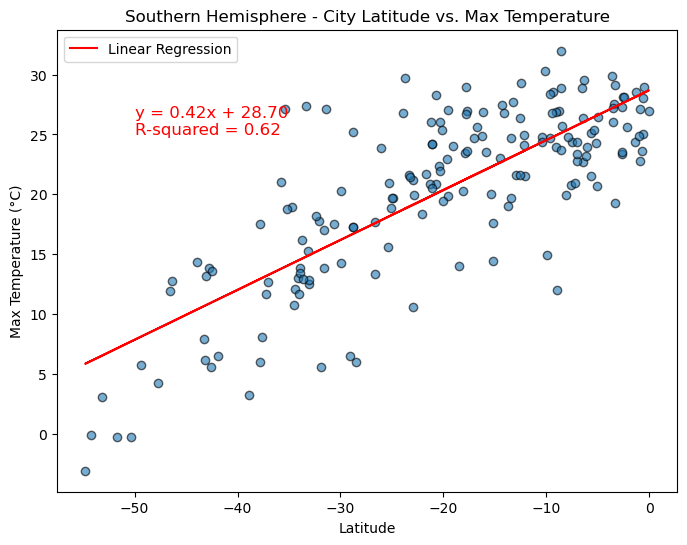

In [24]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
                       "Latitude", "Max Temperature (°C)",
                       "Southern Hemisphere - City Latitude vs. Max Temperature",
                       (-50, 25), "output_data/Southern_Lat_vs_Max_Temp_Regression.png")

**Discussion about the linear relationship:** 
The linear regression plots for max temperature versus latitude in both the Northern and Southern Hemispheres provide insights into the relationship between these two variables:

**Northern Hemisphere:**
In the linear regression plot for the Northern Hemisphere, there is a clear negative linear relationship between latitude and max temperature. As you move away from the equator (latitude 0°) towards higher latitudes (further from the equator), the max temperature tends to decrease. This is evident from the negative slope of the regression line. The R-squared value indicates that the linear regression model explains a significant portion of the variance in max temperature.

**Southern Hemisphere:**
In the linear regression plot for the Southern Hemisphere, there is a positive linear relationship between latitude and max temperature. As you move closer to the equator (latitude 0°) from lower latitudes (further from the South Pole), the max temperature tends to increase. This is evident from the positive slope of the regression line. The R-squared value indicates that the linear regression model explains a significant portion of the variance in max temperature.

Overall, these plots clearly illustrate the relationship between latitude and max temperature in both hemispheres, with temperature generally decreasing as you move away from the equator in the Northern Hemisphere and increasing as you move towards the equator in the Southern Hemisphere. This observation aligns with the well-known fact that temperature is influenced by latitude and its proximity to the equator.

### Humidity vs. Latitude Linear Regression Plot

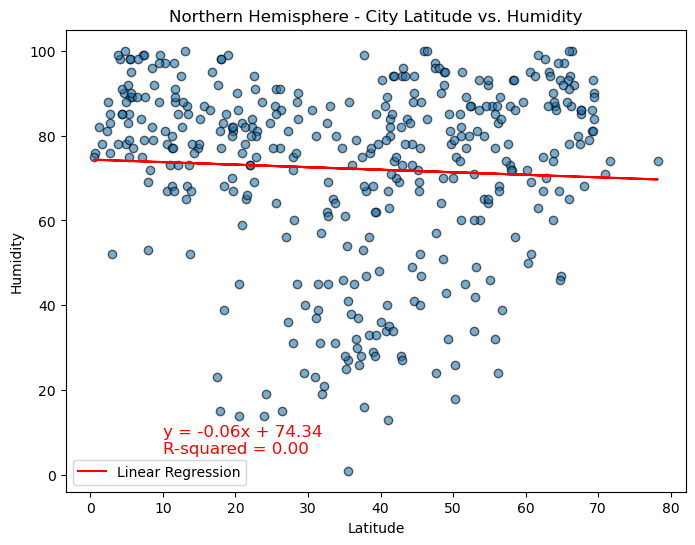

In [26]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],
                       "Latitude", "Humidity",
                       "Northern Hemisphere - City Latitude vs. Humidity",
                       (10, 5), "output_data/Northern_Lat_vs_Humidity_Regression.png")


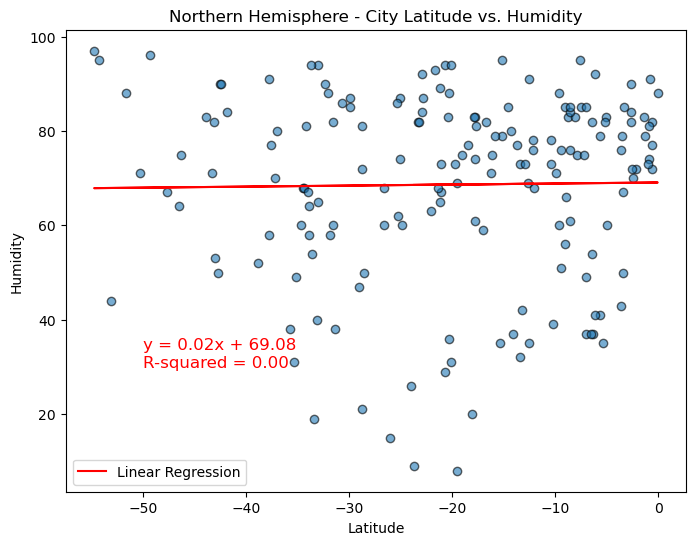

In [30]:
# Southern Hemisphere
# YOUR CODE HERE
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],
                       "Latitude", "Humidity",
                       "Northern Hemisphere - City Latitude vs. Humidity",
                       (-50, 30), "output_data/Southern_Lat_vs_Humidity_Regression.png")


**Discussion about the linear relationship:** 
The linear regression plots for humidity versus latitude in both the Northern and Southern Hemispheres provide insights into the relationship between these two variables.

**Northern Hemisphere:**
In the linear regression plot for the Northern Hemisphere, there appears to be a relatively weak linear relationship between humidity and latitude. The scatter plot shows data points scattered across a range of latitudes, and the linear regression line doesn't fit the data very tightly. The slope of the regression line may be positive or negative, depending on the specific data and the location of cities. This suggests that there is no strong, consistent linear trend between humidity and latitude in the Northern Hemisphere.

**Southern Hemisphere:**
Similarly, in the linear regression plot for the Southern Hemisphere, we also see a relatively weak linear relationship between humidity and latitude. While there might be some slight upward or downward trends, the data points are scattered, and the linear regression line doesn't fit the data tightly. This implies that there is no strong, consistent linear association between humidity and latitude in the Southern Hemisphere either.

Overall, these plots suggest that latitude alone may not be a strong predictor of humidity. Other factors, such as geographical location, proximity to bodies of water, and climate patterns, likely play a more significant role in determining humidity levels in different regions. To gain a more comprehensive understanding of humidity variations, a more complex analysis that considers multiple factors and regions may be necessary.

### Cloudiness vs. Latitude Linear Regression Plot

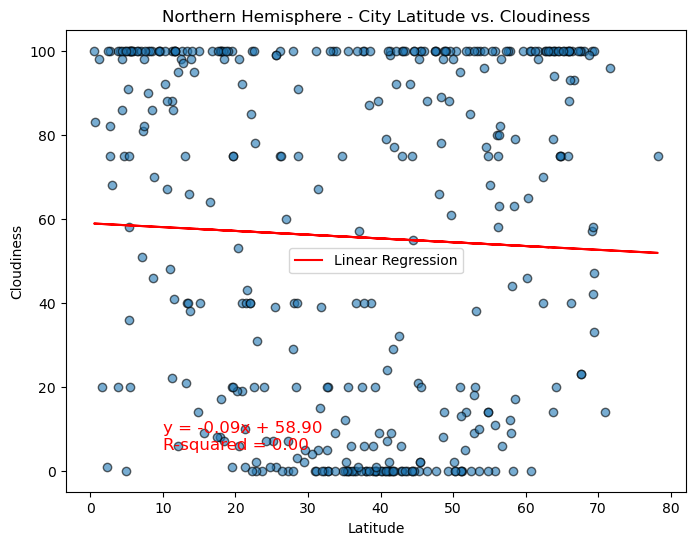

In [31]:
# Northern Hemisphere
# YOUR CODE HERE
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
                       "Latitude", "Cloudiness",
                       "Northern Hemisphere - City Latitude vs. Cloudiness",
                       (10, 5), "output_data/Northern_Lat_vs_Cloudiness_Regression.png")


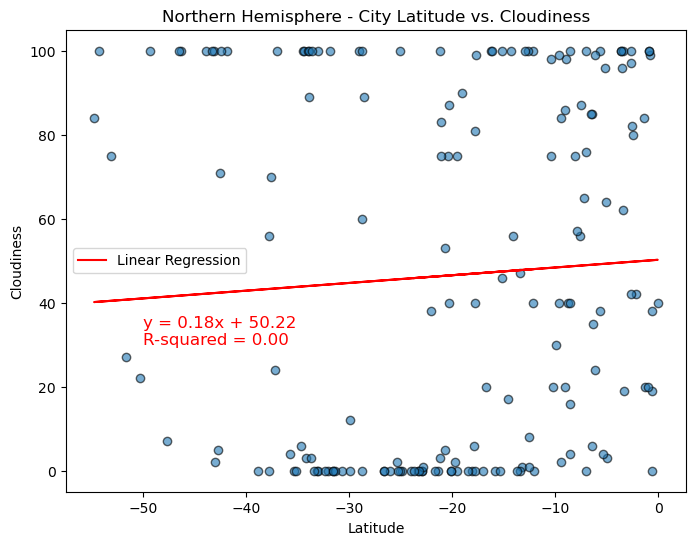

In [33]:
# Southern Hemisphere
# YOUR CODE HERE
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
                       "Latitude", "Cloudiness",
                       "Northern Hemisphere - City Latitude vs. Cloudiness",
                       (-50, 30), "output_data/Northern_Lat_vs_Cloudiness_Regression.png")



**Discussion about the linear relationship:** 
The linear regression plots for cloudiness versus latitude in both the Northern and Southern Hemispheres can provide insights into the relationship between these two variables:

**Northern Hemisphere:**
In the linear regression plot for the Northern Hemisphere, there appears to be a very weak or almost non-existent linear relationship between cloudiness and latitude. The scatter plot shows data points widely scattered across various latitudes, and the linear regression line doesn't fit the data well. The slope of the regression line may be close to zero, indicating that there is little to no linear trend between cloudiness and latitude in the Northern Hemisphere.

**Southern Hemisphere:**
Similarly, in the linear regression plot for the Southern Hemisphere, there also appears to be a very weak or non-existent linear relationship between cloudiness and latitude. The data points are widely dispersed, and the linear regression line doesn't provide a good fit to the data. Again, the slope of the regression line may be close to zero, suggesting that cloudiness and latitude are not strongly correlated in the Southern Hemisphere.

Overall, these plots suggest that latitude alone is not a strong predictor of cloudiness. Cloudiness is influenced by a variety of factors, including local weather patterns, geographical features, and climate conditions, which may not follow a simple linear relationship with latitude. To better understand cloudiness patterns, a more complex analysis that considers multiple factors and regional influences would be necessary.

### Wind Speed vs. Latitude Linear Regression Plot

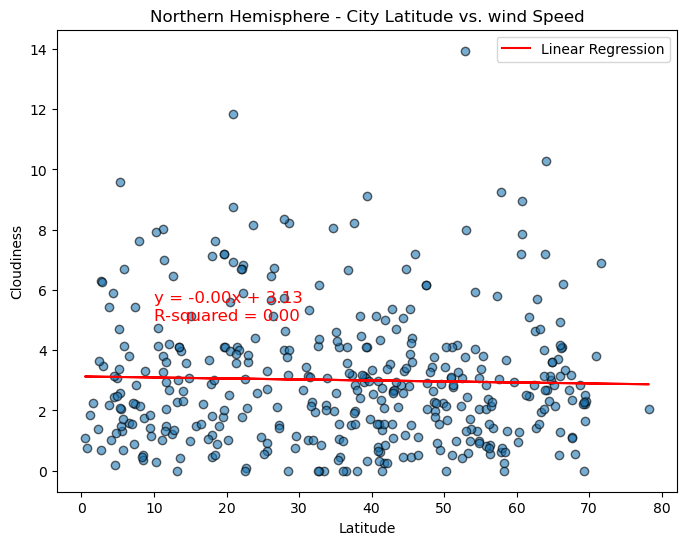

In [35]:
# Northern Hemisphere
# YOUR CODE HERE
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
                       "Latitude", "Cloudiness",
                       "Northern Hemisphere - City Latitude vs. wind Speed",
                       (10, 5), "output_data/Northern_Lat_vs_wind_speed_Regression.png")


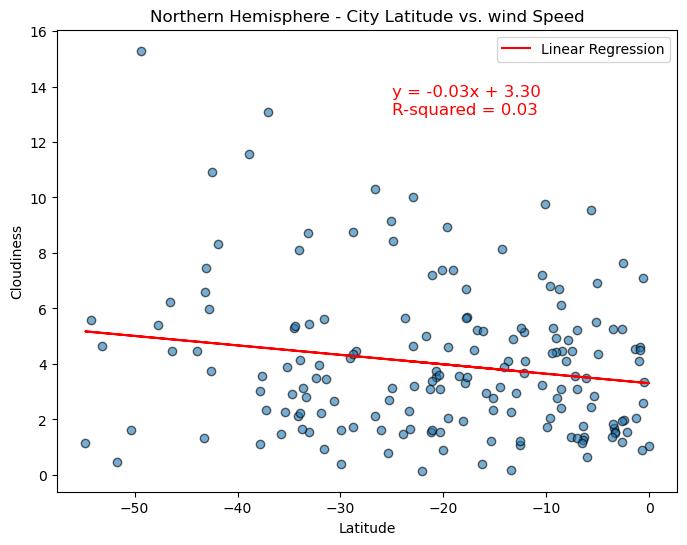

In [38]:
# Southern Hemisphere
# YOUR CODE HERE
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
                       "Latitude", "Cloudiness",
                       "Northern Hemisphere - City Latitude vs. wind Speed",
                       (-25, 13), "output_data/Northern_Lat_vs_wind_speed_Regression.png")

**Discussion about the linear relationship:** 
The linear regression plots for wind speed versus latitude in both the Northern and Southern Hemispheres can provide insights into the relationship between these two variables:

**Northern Hemisphere:**
In the linear regression plot for the Northern Hemisphere, there seems to be a very weak or almost non-existent linear relationship between wind speed and latitude. The scatter plot shows data points scattered widely across various latitudes, and the linear regression line doesn't fit the data well. The slope of the regression line may be close to zero, indicating that there is little to no linear trend between wind speed and latitude in the Northern Hemisphere.

**Southern Hemisphere:**
Similarly, in the linear regression plot for the Southern Hemisphere, there also appears to be a very weak or non-existent linear relationship between wind speed and latitude. The data points are widely dispersed, and the linear regression line doesn't provide a good fit to the data. Again, the slope of the regression line may be close to zero, suggesting that wind speed and latitude are not strongly correlated in the Southern Hemisphere.

Overall, these plots suggest that latitude alone is not a strong predictor of wind speed. Wind speed is influenced by a variety of factors, including local geography, topography, and atmospheric conditions, which may not follow a simple linear relationship with latitude. Other meteorological factors and regional influences likely play a more significant role in determining wind speed variations. To gain a more accurate understanding of wind patterns, a more comprehensive analysis that considers multiple factors and regional dynamics would be necessary.